In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [65]:
#Importing all the needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#Importing the Training set
train=pd.read_csv('train.csv')

<Axes: >

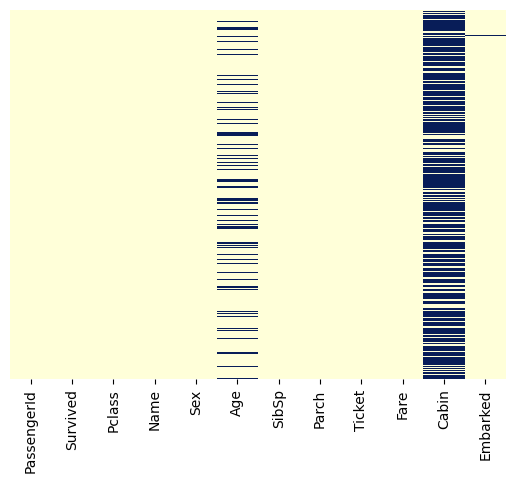

In [67]:
#Visualizing the null values using HeatMaps
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='Survived', ylabel='count'>

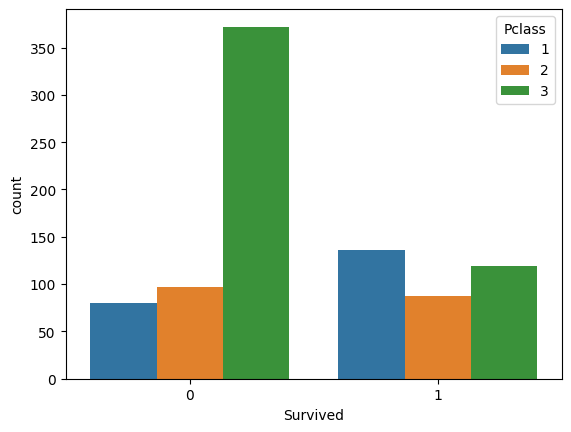

In [68]:
#Visualizing Survivors based on their Passenger Classes
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7428\3045378865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, bins=30)


<Axes: xlabel='Age'>

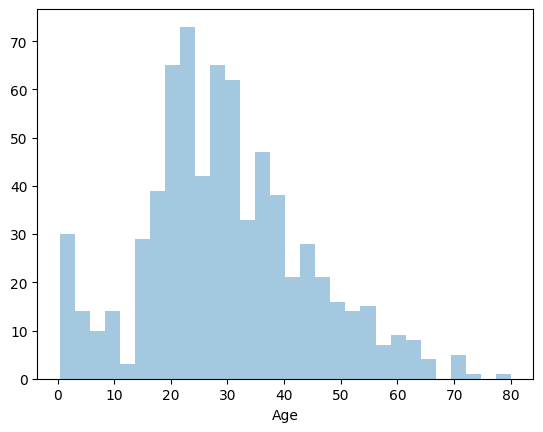

In [69]:
#Plotting on the bases of the Age of the Passengers
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SibSp', ylabel='count'>

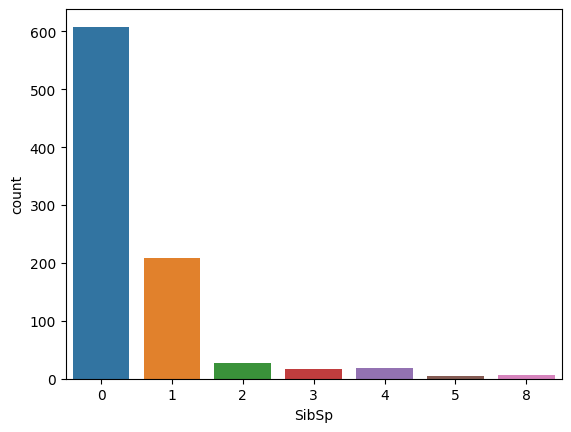

In [70]:
#Counting the number of Passengers who had boarded with their siblings and/or their spouses
sns.countplot(x='SibSp', data=train)

<Axes: ylabel='Frequency'>

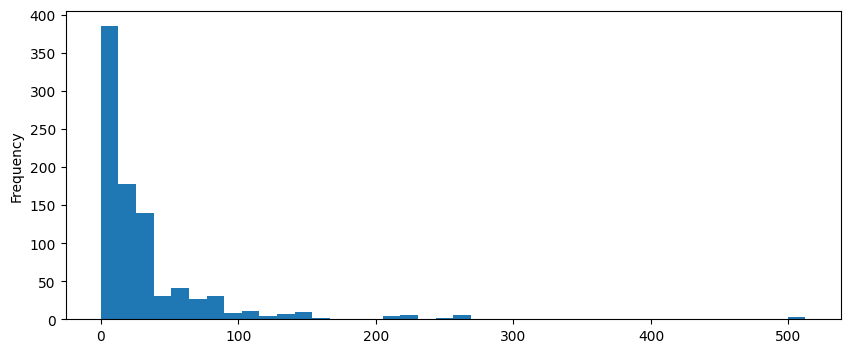

In [71]:
#Plotting Fare against the number of Passengers
train['Fare'].plot.hist(bins=40, figsize=(10,4))

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Age'>

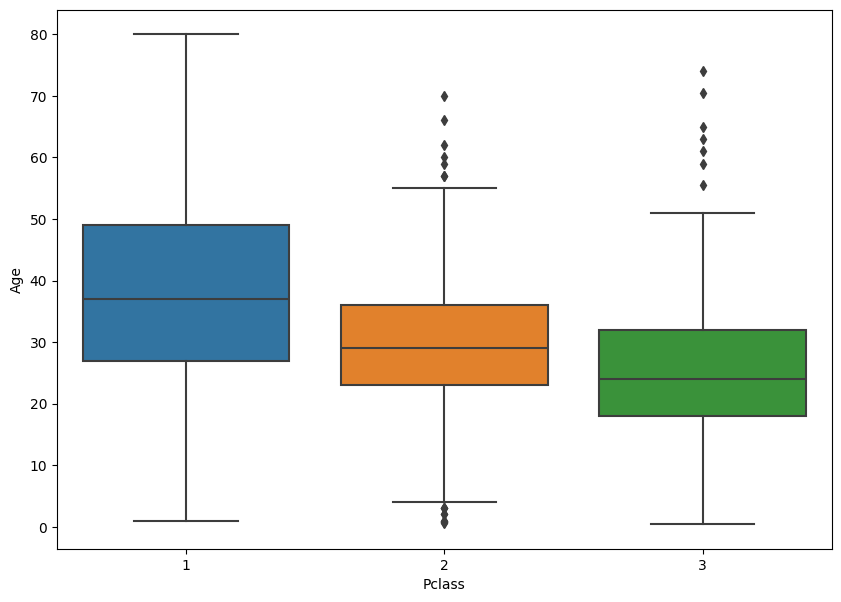

In [72]:
#Getting the Age of the Passengers on the basis of their Class, also the average Age per class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [73]:
#Defing a  function that will impute the Age columns on the basis of the Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [74]:
#Calling the above defined function to impute the Age column
train['Age']=train[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7428\1732189604.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\Lucas\AppData\Local\Temp\ipykernel_7428\1732189604.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

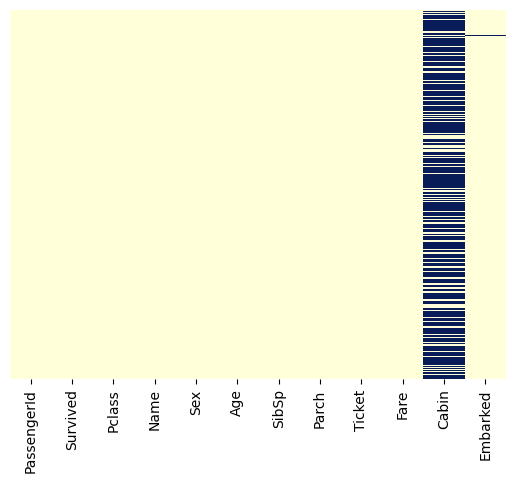

In [75]:
#Visualizing after the Imputation of the Age column
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [76]:
#Dropping the Cabin column since it doesn't have any direct effect on the prediction
train.drop('Cabin', axis=1, inplace=True)

In [77]:
#Checking the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

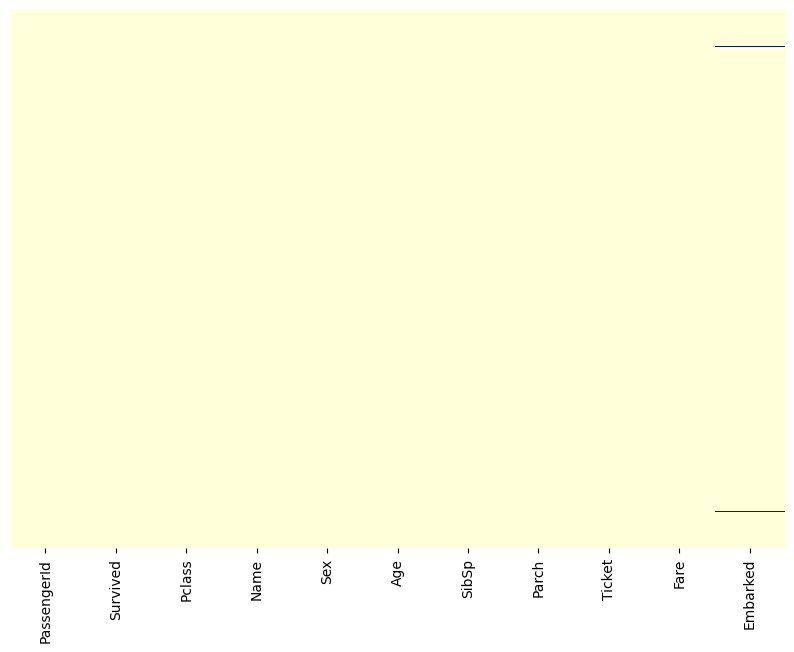

In [78]:
#Using HeatMap again to visualize the resultant set
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [79]:
#Dropping the remaining rows with null values in them
train.dropna(inplace=True)

In [80]:
#Dealing with categorical column Sex, Embarked, making dummmies
sex=pd.get_dummies(train['Sex'], drop_first=True)
embark=pd.get_dummies(train['Embarked'], drop_first=True)
classes=pd.get_dummies(train['Pclass'])

In [81]:
#Concatinating the newly created dummy columns with the existing dataframe
train=pd.concat([train,sex,embark], axis=1)
train=pd.concat([train,classes], axis=1)

In [82]:
#Dropping the those columns which will not be used during training
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.drop('Pclass', axis=1, inplace=True)

In [83]:
# We are done with cleaning of the training set. We now need to do the same to the Test set

In [84]:
#Importing the Test set
test=pd.read_csv('test.csv')

<Axes: >

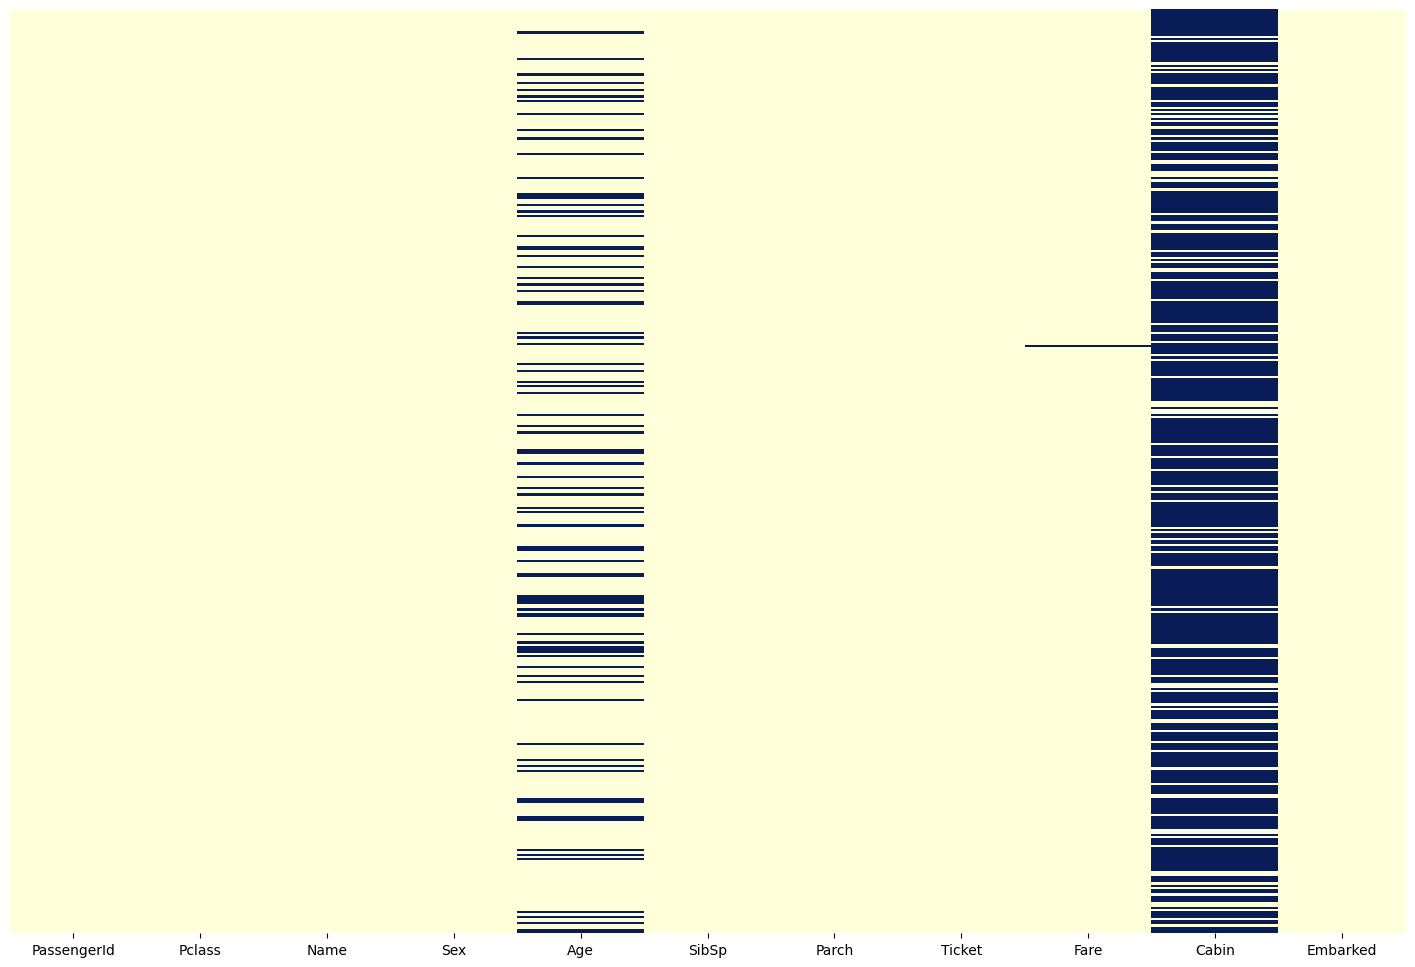

In [85]:
#Visulazing missing values using HeatMap
plt.figure(figsize=(18,12))
sns.heatmap(test.isnull(),yticklabels=False, cbar=False, cmap='YlGnBu')

c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Lucas\OneDrive\Documentos\avancandoPython\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Age'>

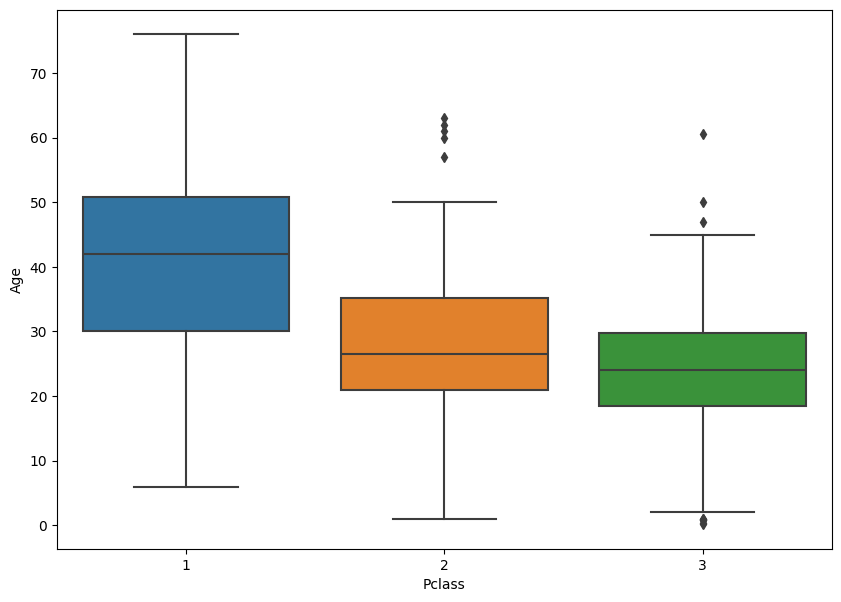

In [86]:
#Using BoxPlot to see which age group belongs to which Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=test)

In [87]:
#Defining a function which will be used to impute Age columns of the Test set
def impute_age2(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [88]:
#Imputing the Age column by calling the above function        
test['Age']=test[['Age', 'Pclass']].apply(impute_age2, axis=1)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_7428\2403222927.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\Lucas\AppData\Local\Temp\ipykernel_7428\2403222927.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


In [89]:
# As we saw in the heatmap that some of the values of 'Fare' column are missing
#Imputing Fare column for missing values
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(test.iloc[:, 8:9])
# test.iloc[:, 8:9] = imputer.transform(test.iloc[:, 8:9])

# Imputando valores da media para a coluna Fare
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
test['Fare'] = list(imputer.fit_transform(test[['Fare']]))
test['Fare'] = [x[0] for x in test['Fare']]

<Axes: >

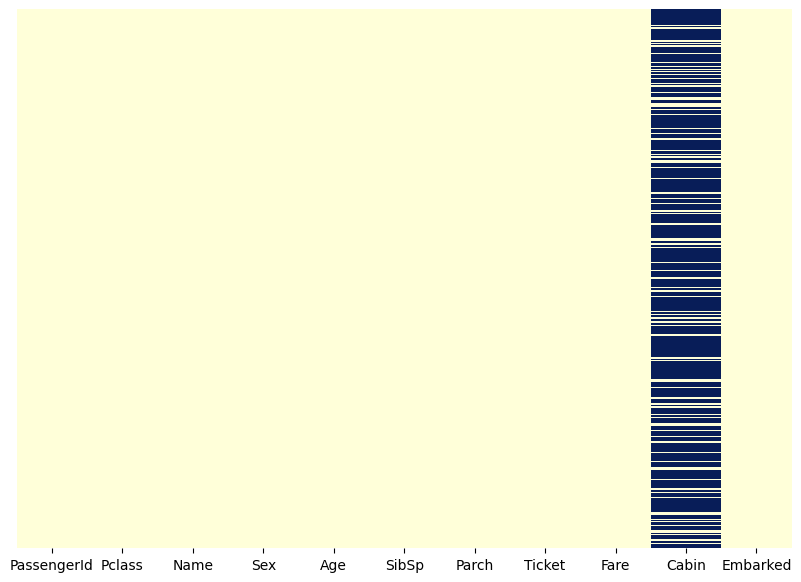

In [90]:
#Using HeatMap again to visualize the remaining missing values from the set
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [91]:
# The 'Cabin' column has too many values missing, so cannot perform imputation here.
#Dropping the Cabin column as done in the Training set
test.drop('Cabin', axis=1, inplace=True)

<Axes: >

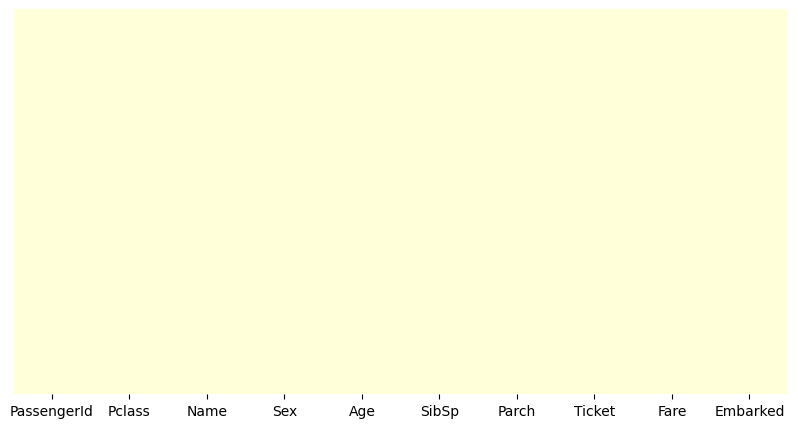

In [92]:
#Visualizing again to see the effect after Imputation
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [93]:
#Creating Dummy variables for categorical feaatures of the set and concatinating them to the Test set
sex2=pd.get_dummies(test['Sex'], drop_first=True)
embark2=pd.get_dummies(test['Embarked'], drop_first=True)
test=pd.concat([test,sex2,embark2], axis=1)
pclasses=pd.get_dummies(test['Pclass'])
test=pd.concat([test,pclasses], axis=1)

In [100]:
#Saving PassengerId before dropping it so that we can add it to the resultant csv file later
result=test.iloc[:,0]
result

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [95]:
#Dropping the redundant features which were converted to dummies earlier
test.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)
test.drop('Pclass', axis=1, inplace=True)

## Building a Logistic Regression Model

In [118]:
#Train Test Split
x_train=train.iloc[:,1:]
y_train=train.iloc[:,0:1]
x_test=test.iloc[:,:]

x_train.dtypes
x_train


,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,22.0,1,0,7.2500,True,False,True,False,False,True
1,38.0,1,0,71.2833,False,False,False,True,False,False
2,26.0,0,0,7.9250,False,False,True,False,False,True
3,35.0,1,0,53.1000,False,False,True,True,False,False
4,35.0,0,0,8.0500,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,True,False,True,False,True,False
887,19.0,0,0,30.0000,False,False,True,True,False,False
888,24.0,1,2,23.4500,False,False,True,False,False,True
889,26.0,0,0,30.0000,True,False,False,True,False,False


In [125]:
# Convertendo as colunas booleanas para int
x_train[['male', 'Q', 'S', 1, 2, 3]] = x_train[['male', 'Q', 'S', 1, 2, 3]].astype(int)
x_test[['male', 'Q', 'S', 1, 2, 3]] = x_test[['male', 'Q', 'S', 1, 2, 3]].astype(int)

In [123]:

x_train.drop(['1','2','3'], axis=1, inplace=True)

In [127]:
x_train

,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,22.0,1,0,7.2500,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,0,1,0
887,19.0,0,0,30.0000,0,0,1,1,0,0
888,24.0,1,2,23.4500,0,0,1,0,0,1
889,26.0,0,0,30.0000,1,0,0,1,0,0


In [126]:
x_train.dtypes

Age      float64
SibSp      int64
Parch      int64
Fare     float64
male       int32
Q          int32
S          int32
1          int32
2          int32
3          int32
dtype: object

In [129]:
X = train
X = pd.get_dummies(X, drop_first = True)

y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

,Age,SibSp,Parch,Fare,male,Q,S,1,2,3
0,22.0,1,0,7.2500,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,0,1,0
887,19.0,0,0,30.0000,0,0,1,1,0,0
888,24.0,1,2,23.4500,0,0,1,0,0,1
889,26.0,0,0,30.0000,1,0,0,1,0,0


## Training and Predicting 

In [128]:
from sklearn.linear_model import LogisticRegression
logisticReg=LogisticRegression()
logisticReg.fit(x_train,y_train)

y_pred= logisticReg.predict(x_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

## Calculating accuracy of the model

In [107]:
accuracy = round(logisticReg.score(x_train, y_train) * 100, 2)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(accuracy)

## Writing the predictions to a csv file

In [108]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('logresult.csv', index=False)

NameError: name 'y_pred' is not defined

# Using Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
ranFor = RandomForestClassifier(n_estimators = 70)

# Training and Predicting

In [110]:
ranFor.fit(x_train,y_train)
y_pred2= ranFor.predict(x_test)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

# Calculating accuracy of the model

In [ ]:
accuracy2 =round(ranFor.score(x_train, y_train)*100,2)

In [ ]:
print(accuracy2)

# Writing the predictions to a csv file

In [ ]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('rfcresult.csv', index=False)

# Using Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc=SVC()

# Training and Predicting

In [ ]:
svc.fit(x_train, y_train)

y_pred3=svc.predict(x_test)

 ## Calculating accuracy of the model

In [ ]:
accuracy3=round(svc.score(x_train, y_train)*100,2)

In [ ]:
print(accuracy3)


## Writing the predictions to a csv file

In [ ]:
df=pd.DataFrame(dict(PassengerId = result, Survived = y_pred2)).reset_index()
df.drop('index', axis=1, inplace=True)

df.to_csv('svcresult.csv', index=False)

### Obviously we see that the Random Forest Classifier gave more accurate predictions.